In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Welcome to Salary Prediction System
Press Enter key to proceed

0 ... attachment_Salary-Data_lyst5512.csv
Select file to create ML model0
attachment_Salary-Data_lyst5512.csv is selected
Reading csv file
Creating Dataset
Dataset created
Enter test data size (between 0 and 1)0.3
Model Creation in progress
Model is created
Press ENTER key to predict test data in trained model

[[ 7.1]
 [ 3.7]
 [10.5]
 [ 4.9]
 [ 1.5]
 [ 2.9]
 [ 9.5]
 [ 6.8]
 [ 1.3]] .... [ 98273.  57189. 121872.  67938.  37731.  56642. 116969.  91738.  46205.] .... [ 92845.27878346  60171.38155024 125519.17601669  71703.34527961
  39029.44804638  52483.40573065 115909.20624221  89962.28785112
  37107.45409149]
[7.1] .... 98273.0 .... 92845.27878346397
[3.7] .... 57189.0 .... 60171.38155023634
[10.5] .... 121872.0 .... 125519.1760166916
[4.9] .... 67938.0 .... 71703.3452796108
[1.5] .... 37731.0 .... 39029.44804638317
[2.9] .... 56642.0 .... 52483.405730653365
[9.5] .... 116969.0 .... 115909.2062422129
[6.8] .... 91738.0 ..

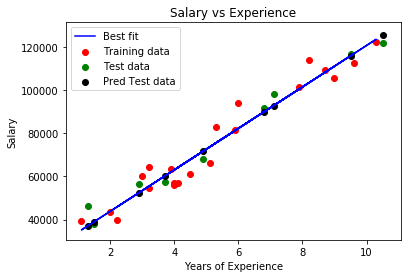

Our model is 97.76% accurate
Now you can pridict salary of an employee using our model

Enter experience in years for the Candidates, seprated by a comma
6.5,6,10,20,9,11,12.5,14.5,16


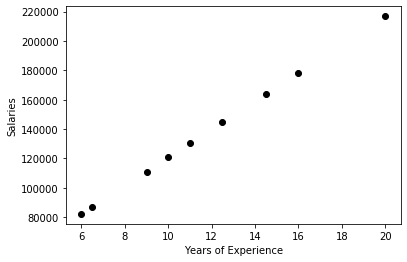

   Experience       Salaries
0         6.5   87079.296919
1         6.0   82274.312032
2        10.0  120714.191129
3        20.0  216813.888874
4         9.0  111104.221355
5        11.0  130324.160904
6        12.5  144739.115566
7        14.5  163959.055115
8        16.0  178374.009776


In [ ]:
def welcome():
    print("Welcome to Salary Prediction System")
    print("Press Enter key to proceed")
    input()

def checkcsv():
    csv_files=[]
    cur_dir=os.getcwd()
    content_list=os.listdir(cur_dir)
    
    for x in content_list:
        if x.split(".")[-1]=='csv':
            csv_files.append(x)
    if len(csv_files)==0:
        return "No csv file in the directory"
    else:
        return csv_files

def display_and_select_csv(csv_files):
    i=0
    for file_name in csv_files:
        print(i,'...',file_name)
        i+=1
        
    return csv_files[int(input("Select file to create ML model"))]

def graph(X_train,Y_train,regressionObject,X_test,Y_test,Y_pred):
    plt.scatter(X_train,Y_train,color='red',label='Training data')
    plt.plot(X_train,regressionObject.predict(X_train),color='blue',label='Best fit')
    plt.scatter(X_test,Y_test,color='green',label='Test data')
    plt.scatter(X_test,Y_pred,color='black',label='Pred Test data')
    plt.title("Salary vs Experience")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.show()

def main():
    welcome()
    try:
        csv_files=checkcsv()
        if csv_files=='No csv file in the directory':
            raise FileNotFoundError("No csv file in the directory")
            
        csv_file=display_and_select_csv(csv_files)
        print(csv_file, 'is selected')
        print("Reading csv file")
        print("Creating Dataset")
        dataset=pd.read_csv(csv_file)
        print("Dataset created")
        X=dataset.iloc[:,:-1].values
        Y=dataset.iloc[:,-1].values
        s=float(input("Enter test data size (between 0 and 1)"))
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=s)
        print("Model Creation in progress")
        regressionObject=LinearRegression()
        regressionObject.fit(X_train,Y_train)
        print("Model is created")
        print("Press ENTER key to predict test data in trained model")
        input()
        Y_pred=regressionObject.predict(X_test)
        i=0
        print(X_test,'....',Y_test,'....',Y_pred)
        while i <len(X_test):
            print(X_test[i],'....',Y_test[i],'....',Y_pred[i])
            i+=1
            
        print("Press ENTER Key to see above result in graphical format")
        input()
        graph(X_train,Y_train,regressionObject,X_test,Y_test,Y_pred)
        r2=r2_score(Y_test,Y_pred)   
        print("Our model is %2.2f%% accurate" %(r2*100))
        print("Now you can pridict salary of an employee using our model")
        print("\nEnter experience in years for the Candidates, seprated by a comma")
        exp=[float(e) for e in input().split(',')]
        ex=[]
        
        for x in exp:
            ex.append([x])
        experience=np.array(ex)
        salaries=regressionObject.predict(experience)
        
        plt.scatter(experience,salaries,color='black')
        plt.xlabel("Years of Experience")
        plt.ylabel("Salaries")
        plt.show()
        
        d=pd.DataFrame({'Experience':exp,'Salaries':salaries})
        print(d)
        
    
    except FileNotFoundError:
        print('No csv file in the directory')
        print("Press ENTER key to exit")
        input()
        exit()
    
    
if __name__=="__main__":
    main()
    input()

## 